# Statistics

Each experiment has been run for *N* times and the related data cointaining number of states, path lengths, clearances and execution times are collected in the correspondent ```solution_<environment>_<objective>.log``` files.

We will create "*aggregative runs*" statistics with comparison between planners for each environment from a quantitative point of view.



In [ ]:
import matplotlib.pyplot as plt
import math
import argparse
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns

def collect_log(input_path, planner):
    with open(input_path,'r') as f:
        lines = f.readlines()

        num_states_approx = []
        num_states_exact = []
        clearances_approx = []
        clearances_exact = []
        lengths_approx = []
        lengths_exact = []
        times = []
        
        
        for row in tqdm(lines):
            if planner == 'RRT':
                approx_sol, _, _, _, n_states, _, _, _, _, _, _, _, _, clearance, _, length, _, _, _, _, time, _ = list(map(float, row.split('; ')[:-1]))
            else:
                approx_sol, _, _, _, _, n_states, _, _, _, _, _, _, _, _, _, clearance, _, length, _, _, _, _, time, _ = list(map(float, row.split('; ')[:-1]))
            
            if approx_sol == 1.0:
                num_states_approx.append(int(n_states))
                lengths_approx.append(length)
                clearances_approx.append(clearance)
            else:
                num_states_exact.append(int(n_states))
                lengths_exact.append(length)
                clearances_exact.append(clearance)
                times.append(time)

    return num_states_exact, num_states_approx, clearances_exact, clearances_approx, lengths_exact, lengths_approx, times

## Experiment 1: Obstacles avoidance

### Path length minimization

100%|██████████| 100/100 [00:00<00:00, 75464.27it/s]


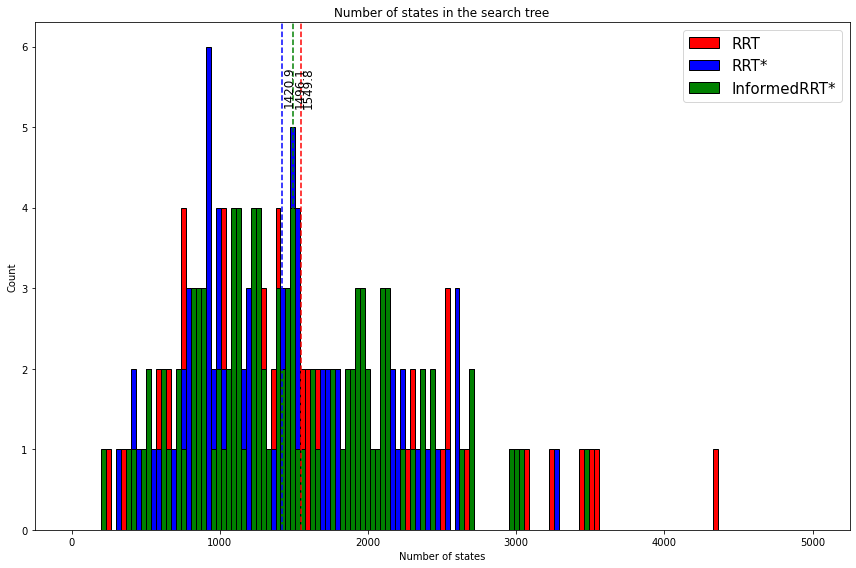

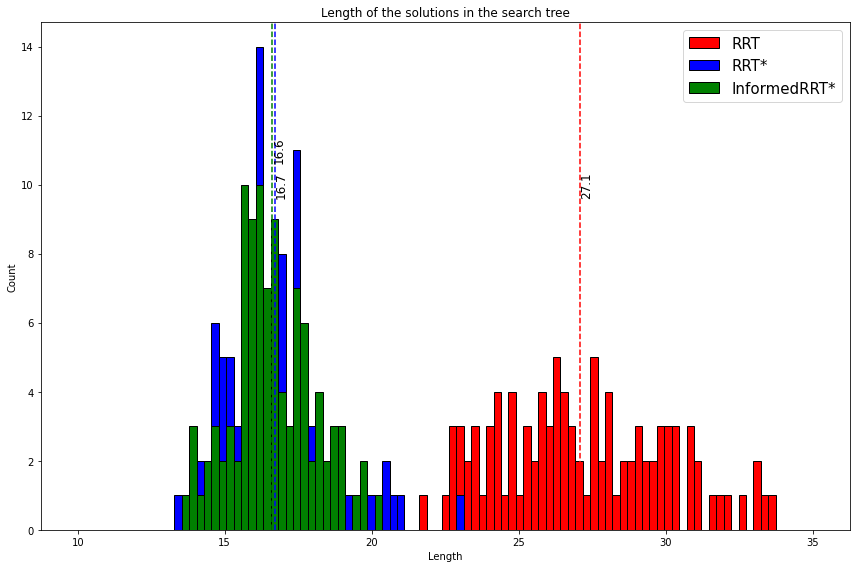

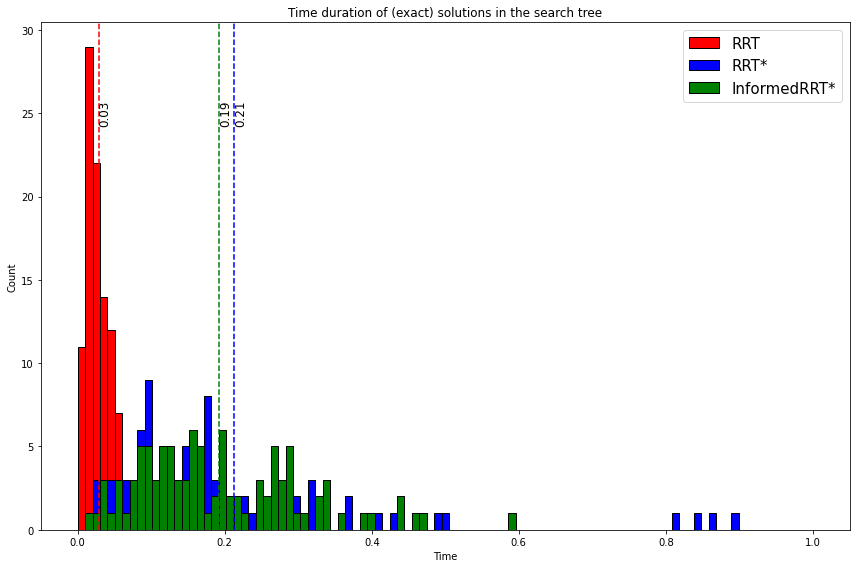

In [ ]:
input_paths = ['solution_obstacles_length_rrt.txt', 'solution_obstacles_length_rrtstar.txt', 'solution_obstacles_length_infrrtstar.txt']
labels = ['RRT', 'RRT*', 'InformedRRT*']

data = dict()
for i in range(len(input_paths)):
    data[labels[i]] = collect_log(input_paths[i], labels[i])

bins = np.linspace(0, 5000, 150)
colors = ['red', 'blue', 'green']
c = 0

# 1) number of states
plt.figure(figsize=(12, 8))
for k in data.keys():
    num_states_exact = data.get(k)[0]
    num_states_approx = data.get(k)[1]
    plt.hist(num_states_exact, bins=bins, color=colors[c], label=k, ec='black')
    #plt.hist(num_states_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(num_states_approx)), ec='black')
    
    mean_exact = sum(num_states_exact)/len(num_states_exact)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 5.5, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    try:
        mean_approx = sum(num_states_approx)/len(num_states_approx)
        plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
        plt.text(mean_approx, 5, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    except:
        pass
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Number of states in the search tree')
plt.xlabel('Number of states')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('obstacles_stats_length_1.png')
plt.show()

'''
plt.figure(figsize=(12, 8))
bins = np.linspace(0, 0.5, 100)
c = 0
# clearances
for k in data.keys():
    clearances_exact = data.get(k)[2]
    clearances_approx = data.get(k)[3]
    plt.hist(clearances_exact, bins=bins, color=colors[c], label=k, ec='black')
    #plt.hist(clearances_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(clearances_approx)), ec='black')
    
    mean_exact = sum(clearances_exact)/len(clearances_exact)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 3.5, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    try:
        mean_approx = sum(clearances_approx)/len(clearances_approx)
        plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
        plt.text(mean_approx, 2.5, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    except:
        pass
    c += 1
plt.legend(loc='upper right', fontsize=15)
plt.title('Clearance of the solutions in the search tree')
plt.xlabel('Clearance')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('obstacles_stats_length_2.png')
plt.show()
'''

plt.figure(figsize=(12, 8))
bins = np.linspace(10, 35, 100)
c = 0
# lengths
for k in data.keys():
    lengths_exact = data.get(k)[4]
    lengths_approx = data.get(k)[5]
    plt.hist(lengths_exact, bins=bins, color=colors[c], label=k, ec='black')
    #plt.hist(lengths_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(lengths_approx)), ec='black')
    
    mean_exact = sum(lengths_exact)/len(lengths_exact)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 11 if c==2 else 10, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    try:
        mean_approx = sum(lengths_approx)/len(lengths_approx)
        plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
        plt.text(mean_approx, 2.5, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    except:
        pass
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Length of the solutions in the search tree')
plt.xlabel('Length')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('obstacles_stats_length_2.png')
plt.show()

plt.figure(figsize=(12, 8))
bins = np.linspace(0, 1, 100)
c = 0
for k in data.keys():
    times = data.get(k)[6]
    plt.hist(times, bins=bins, color=colors[c], label=k, ec='black')
    
    mean_exact = sum(times)/len(times)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 25, s='%3.2f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Time duration of (exact) solutions in the search tree')
plt.xlabel('Time')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('obstacles_stats_length_3.png')
plt.show()

### Minimum clearance maximization

100%|██████████| 100/100 [00:00<00:00, 90531.06it/s]


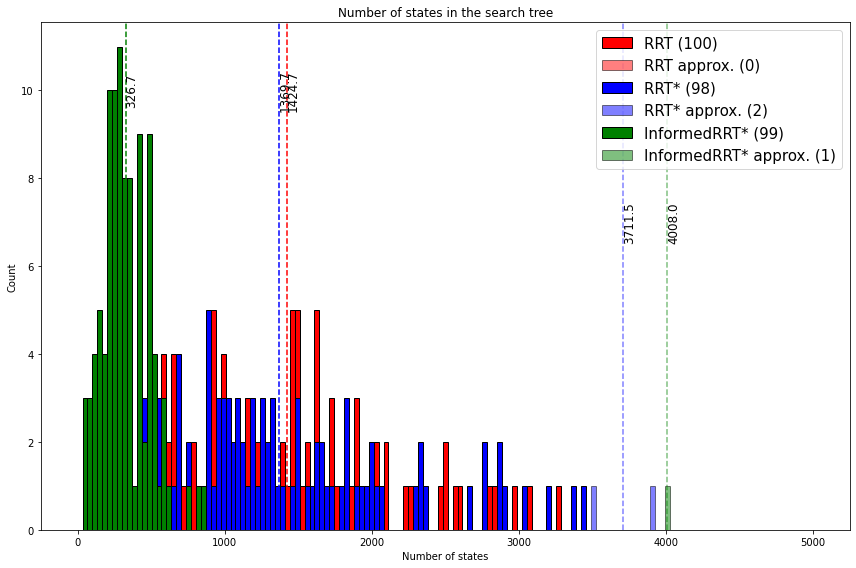

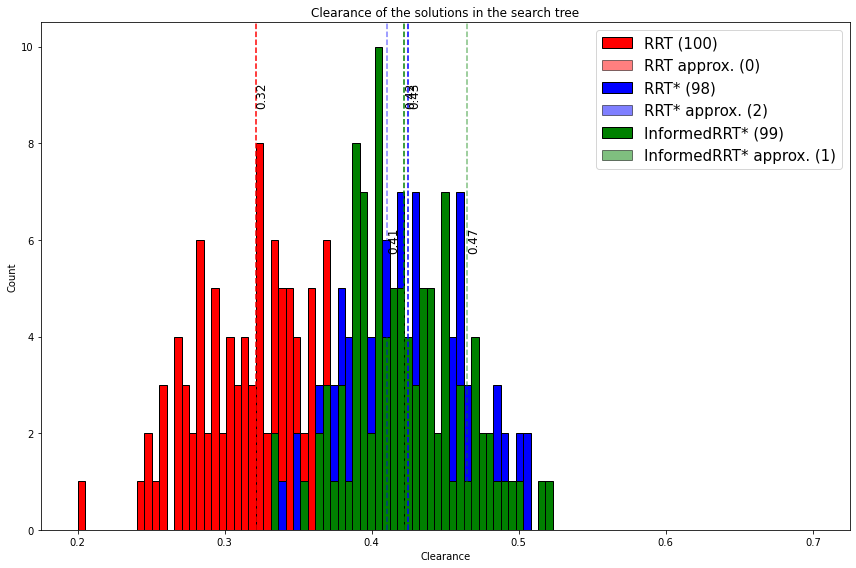

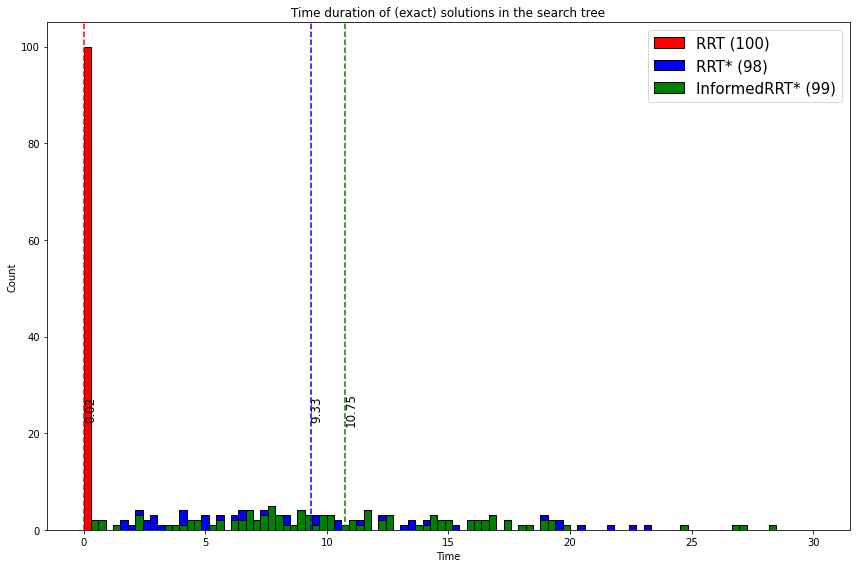

In [ ]:
input_paths = ['solution_obstacles_clearance_rrt.txt', 'solution_obstacles_clearance_rrtstar.txt', 'solution_obstacles_clearance_infrrtstar.txt']
labels = ['RRT', 'RRT*', 'InformedRRT*']

data = dict()
for i in range(len(input_paths)):
    data[labels[i]] = collect_log(input_paths[i], labels[i])

bins = np.linspace(0, 5000, 150)
colors = ['red', 'blue', 'green']
c = 0

# 1) number of states
plt.figure(figsize=(12, 8))
for k in data.keys():
    num_states_exact = data.get(k)[0]
    num_states_approx = data.get(k)[1]
    plt.hist(num_states_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(num_states_exact)), ec='black')
    plt.hist(num_states_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(num_states_approx)), ec='black')
    
    mean_exact = sum(num_states_exact)/len(num_states_exact)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 10, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    try:
        mean_approx = sum(num_states_approx)/len(num_states_approx)
        plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
        plt.text(mean_approx, 7, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    except:
        pass
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Number of states in the search tree')
plt.xlabel('Number of states')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('obstacles_stats_clearance_1.png')
plt.show()


plt.figure(figsize=(12, 8))
bins = np.linspace(0.2, 0.7, 100)
c = 0
# clearances
for k in data.keys():
    clearances_exact = data.get(k)[2]
    clearances_approx = data.get(k)[3]
    plt.hist(clearances_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(clearances_exact)), ec='black')
    plt.hist(clearances_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(clearances_approx)), ec='black')
    
    mean_exact = sum(clearances_exact)/len(clearances_exact)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 9, s='%3.2f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    try:
        mean_approx = sum(clearances_approx)/len(clearances_approx)
        plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
        plt.text(mean_approx, 6, s='%3.2f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    except:
        pass
    c += 1
plt.legend(loc='upper right', fontsize=15)
plt.title('Clearance of the solutions in the search tree')
plt.xlabel('Clearance')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('obstacles_stats_clearance_2.png')
plt.show()

'''
plt.figure(figsize=(12, 8))
bins = np.linspace(10, 35, 100)
c = 0
# lengths
for k in data.keys():
    lengths_exact = data.get(k)[4]
    lengths_approx = data.get(k)[5]
    plt.hist(lengths_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(lengths_exact)), ec='black')
    plt.hist(lengths_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(lengths_approx)), ec='black')
    
    mean_exact = sum(lengths_exact)/len(lengths_exact)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 11 if c==2 else 10, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    try:
        mean_approx = sum(lengths_approx)/len(lengths_approx)
        plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
        plt.text(mean_approx, 2.5, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    except:
        pass
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Length of the solutions in the search tree')
plt.xlabel('Length')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('obstacles_stats_clearance_2.png')
plt.show()
'''

plt.figure(figsize=(12, 8))
bins = np.linspace(0, 30, 100)
c = 0
for k in data.keys():
    times = data.get(k)[6]
    plt.hist(times, bins=bins, color=colors[c], label=k+' ({})'.format(len(times)), ec='black')
    
    mean_exact = sum(times)/len(times)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 25, s='%3.2f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Time duration of (exact) solutions in the search tree')
plt.xlabel('Time')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('obstacles_stats_clearance_3.png')
plt.show()

## Experiment 2: Maze

100%|██████████| 25/25 [00:00<00:00, 59208.13it/s]


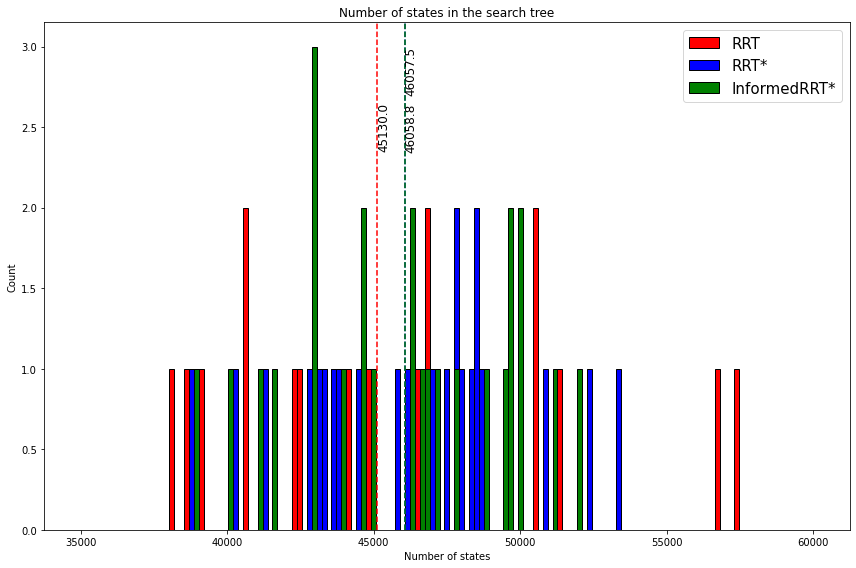

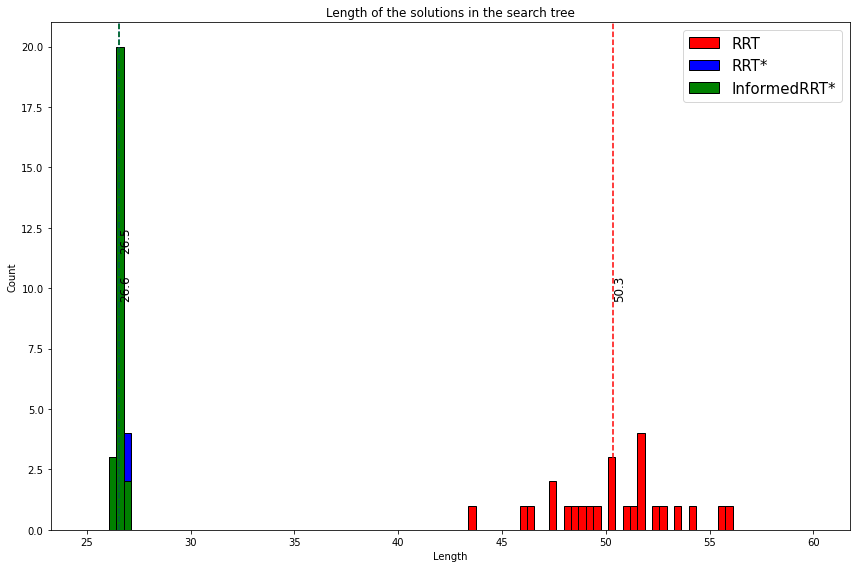

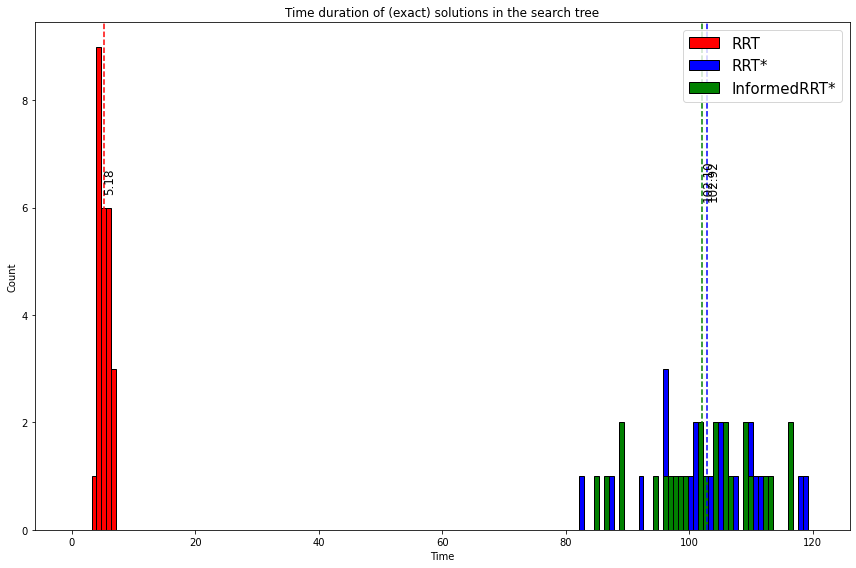

In [ ]:
input_paths = ['solution_maze_rrt.txt', 'solution_maze_rrtstar.txt', 'solution_maze_infrrtstar.txt']
labels = ['RRT', 'RRT*', 'InformedRRT*']

data = dict()
for i in range(len(input_paths)):
    data[labels[i]] = collect_log(input_paths[i], labels[i])

bins = np.linspace(35000, 60000, 150)
colors = ['red', 'blue', 'green']
c = 0

# 1) number of states
plt.figure(figsize=(12, 8))
for k in data.keys():
    num_states_exact = data.get(k)[0]
    num_states_approx = data.get(k)[1]
    plt.hist(num_states_exact, bins=bins, color=colors[c], label=k, ec='black')
    #plt.hist(num_states_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(num_states_approx)), ec='black')
    
    mean_exact = sum(num_states_exact)/len(num_states_exact)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 2.5 if c < 2 else 2.85, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    try:
        mean_approx = sum(num_states_approx)/len(num_states_approx)
        plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
        plt.text(mean_approx, 2, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    except:
        pass
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Number of states in the search tree')
plt.xlabel('Number of states')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('maze_stats_1.png')
plt.show()

'''
plt.figure(figsize=(12, 8))
bins = np.linspace(0.02, 0.1, 100)
c = 0
# clearances
for k in data.keys():
    clearances_exact = data.get(k)[2]
    clearances_approx = data.get(k)[3]
    plt.hist(clearances_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(clearances_exact)), ec='black')
    plt.hist(clearances_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(clearances_approx)), ec='black')
    
    mean_exact = sum(clearances_exact)/len(clearances_exact)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 2, s='%3.2f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    try:
        mean_approx = sum(clearances_approx)/len(clearances_approx)
        plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
        plt.text(mean_approx, 2, s='%3.2f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    except:
        pass
    c += 1
plt.legend(loc='upper right', fontsize=15)
plt.title('Clearance of the solutions in the search tree')
plt.xlabel('Clearance')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('maze_stats_2.png')
plt.show()
'''

plt.figure(figsize=(12, 8))
bins = np.linspace(25, 60, 100)
c = 0
# lengths
for k in data.keys():
    lengths_exact = data.get(k)[4]
    lengths_approx = data.get(k)[5]
    plt.hist(lengths_exact, bins=bins, color=colors[c], label=k, ec='black')
    #plt.hist(lengths_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(lengths_approx)), ec='black')
    
    mean_exact = sum(lengths_exact)/len(lengths_exact)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 12 if c==2 else 10, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    try:
        mean_approx = sum(lengths_approx)/len(lengths_approx)
        plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
        plt.text(mean_approx, 2.5, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    except:
        pass
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Length of the solutions in the search tree')
plt.xlabel('Length')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('maze_stats_2.png')
plt.show()


plt.figure(figsize=(12, 8))
bins = np.linspace(0, 120, 150)
c = 0
for k in data.keys():
    times = data.get(k)[6]
    plt.hist(times, bins=bins, color=colors[c], label=k, ec='black')
    
    mean_exact = sum(times)/len(times)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 6.5, s='%3.2f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Time duration of (exact) solutions in the search tree')
plt.xlabel('Time')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('maze_stats_3.png')
plt.show()

## Experiment 3: Real-world test

100%|██████████| 15/15 [00:00<00:00, 42711.85it/s]


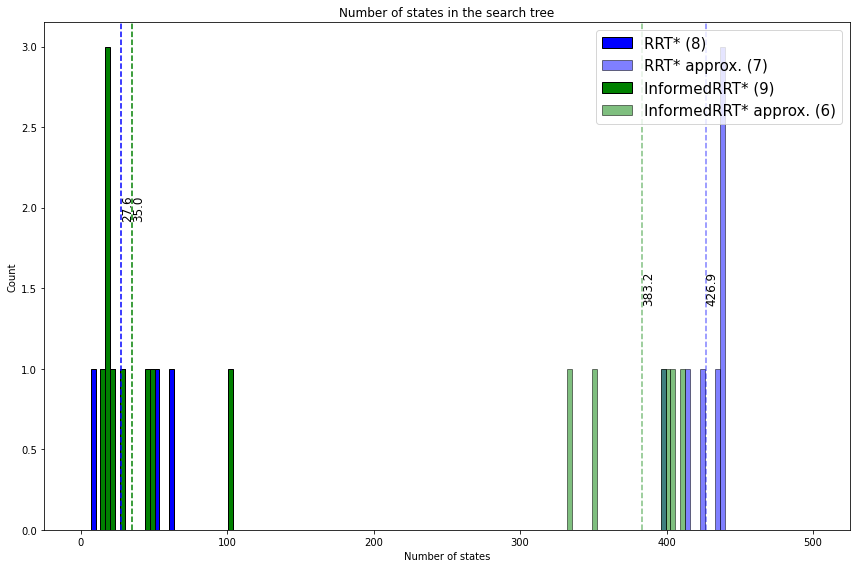

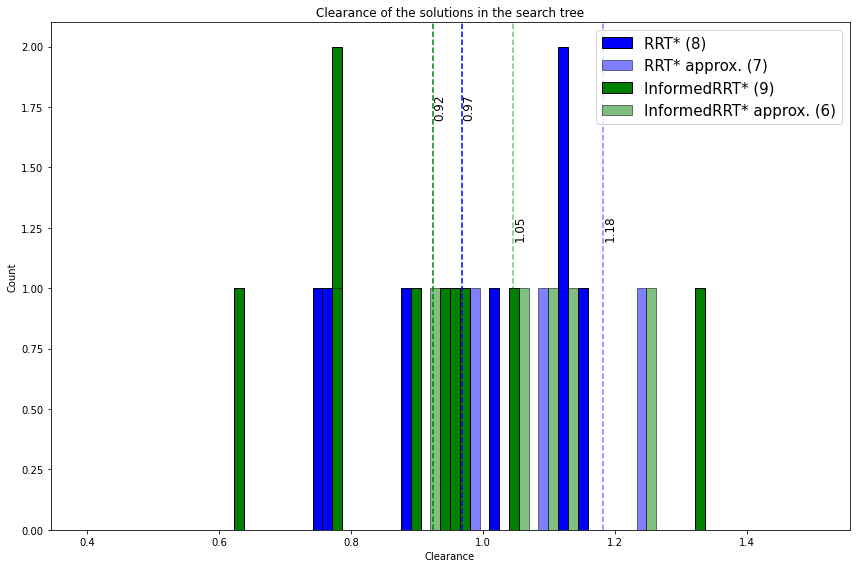

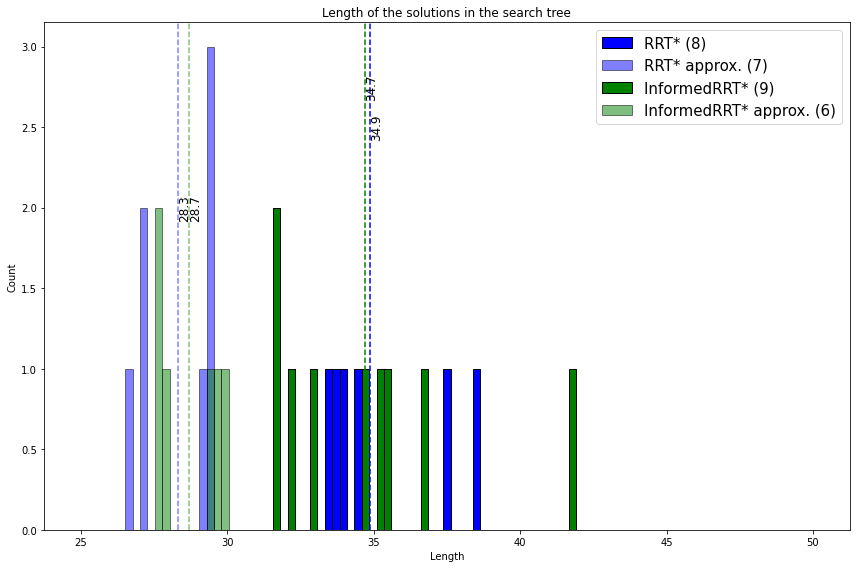

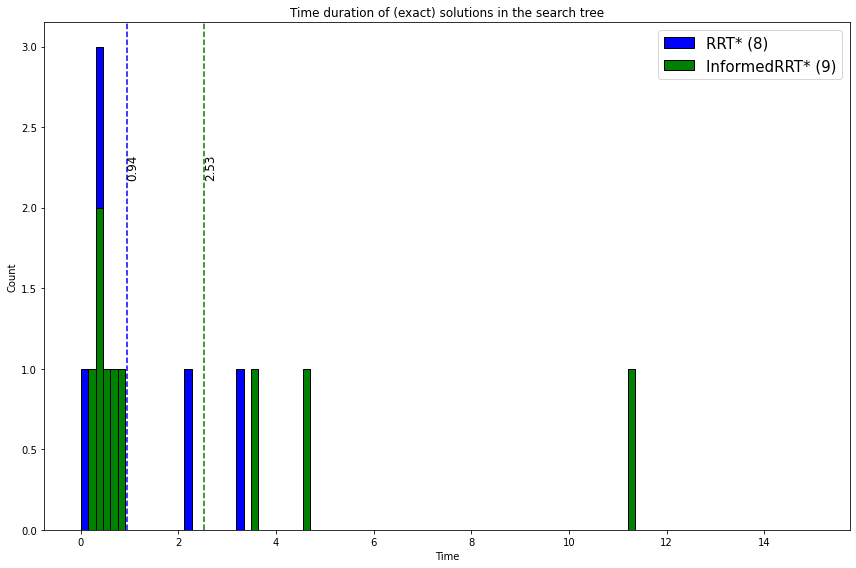

In [ ]:
input_paths = ['solution_real_multi_rrtstar.txt', 'solution_real_multi_infrrtstar.txt']
labels = ['RRT*', 'InformedRRT*']

data = dict()
for i in range(len(input_paths)):
    data[labels[i]] = collect_log(input_paths[i], labels[i])

bins = np.linspace(0, 500, 150)
colors = ['blue', 'green']
c = 0

# 1) number of states
plt.figure(figsize=(12, 8))
for k in data.keys():
    num_states_exact = data.get(k)[0]
    num_states_approx = data.get(k)[1]
    plt.hist(num_states_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(num_states_exact)), ec='black')
    plt.hist(num_states_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(num_states_approx)), ec='black')
    
    mean_exact = sum(num_states_exact)/len(num_states_exact)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 2, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    try:
        mean_approx = sum(num_states_approx)/len(num_states_approx)
        plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
        plt.text(mean_approx, 1.5, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    except:
        pass
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Number of states in the search tree')
plt.xlabel('Number of states')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('real_stats_1.png')
plt.show()


plt.figure(figsize=(12, 8))
bins = np.linspace(0.4, 1.5, 75)
c = 0
# clearances
for k in data.keys():
    clearances_exact = data.get(k)[2]
    clearances_approx = data.get(k)[3]
    plt.hist(clearances_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(clearances_exact)), ec='black')
    plt.hist(clearances_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(clearances_approx)), ec='black')
    
    mean_exact = sum(clearances_exact)/len(clearances_exact)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 1.75, s='%3.2f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    try:
        mean_approx = sum(clearances_approx)/len(clearances_approx)
        plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
        plt.text(mean_approx, 1.25, s='%3.2f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    except:
        pass
    c += 1
plt.legend(loc='upper right', fontsize=15)
plt.title('Clearance of the solutions in the search tree')
plt.xlabel('Clearance')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('real_stats_2.png')
plt.show()


plt.figure(figsize=(12, 8))
bins = np.linspace(25, 50, 100)
c = 0
# lengths
for k in data.keys():
    lengths_exact = data.get(k)[4]
    lengths_approx = data.get(k)[5]
    plt.hist(lengths_exact, bins=bins, color=colors[c], label=k+' ({})'.format(len(lengths_exact)), ec='black')
    plt.hist(lengths_approx, bins=bins, color=colors[c], alpha=0.5, label=k+' approx. ({})'.format(len(lengths_approx)), ec='black')
    
    mean_exact = sum(lengths_exact)/len(lengths_exact)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 2.5 if c==0 else 2.75, s='%3.1f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    try:
        mean_approx = sum(lengths_approx)/len(lengths_approx)
        plt.axvline(x=mean_approx, color=colors[c], linestyle='--', alpha=0.5)
        plt.text(mean_approx, 2, s='%3.1f'%(mean_approx), fontsize=12, rotation=90, verticalalignment='center')
    except:
        pass
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Length of the solutions in the search tree')
plt.xlabel('Length')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('real_stats_3.png')
plt.show()

plt.figure(figsize=(12, 8))
bins = np.linspace(0, 15, 100)
c = 0
for k in data.keys():
    times = data.get(k)[6]
    plt.hist(times, bins=bins, color=colors[c], label=k+' ({})'.format(len(times)), ec='black')
    
    mean_exact = sum(times)/len(times)
    plt.axvline(x=mean_exact, color=colors[c], linestyle='--')
    plt.text(mean_exact, 2.25, s='%3.2f'%(mean_exact), fontsize=12, rotation=90, verticalalignment='center')
    c += 1

plt.legend(loc='upper right', fontsize=15)
plt.title('Time duration of (exact) solutions in the search tree')
plt.xlabel('Time')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('real_stats_4.png')
plt.show()